



















# RAPPORT ARF
### de Toldi Melchior, de Bézenac Emmanuel

## Introduction

Nous aborderons dans ce rapport différents modèles de classification binaire supervisés appliqués sur des données générées artificiellement, et discuterons de leurs résultats. 
   
Nous traiterons les modèles suivants:
* Naive Bayes
* Arbres de décision
* K-nearest neighbors
* Perceptron
* Réseau de neurones

Pour finir, nous appliquerons ces modèles sur un cas d'usage pour tenter de prédire les survivants du naufrage du Titanic.

## Données Artificielles:

   Afin d'observer le comportement des modèles au cours de la phase d'apprentissage et de prédiction, nous avons souhaité utiliser des données bidimensionnelles générés artificiellement. De cette manière, nous pouvons interpréter facilement les résultats, et voir comment se comportent les modèles dans des situations différentes (données linéairement séparables, ou non, par exemple).

   En pratique, la dimension des données est supérieure à 2, mais nous pouvons néenmoins tenter d'inférer certains spécificités de fonctionnement des modèles sur ces données analogues avec une dimension supérieure.
   
### Chargement et Affichage>

In [101]:
import arftools as arf
import numpy as np
import models
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

#### Mélange de 2 gaussiennes

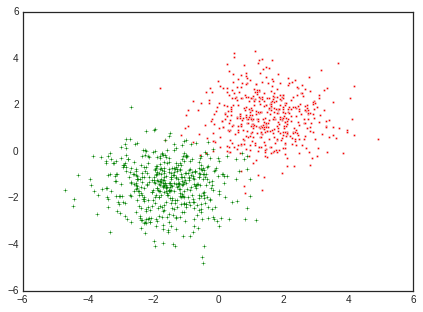

In [104]:
x_twogauss,y_twogauss=arf.load_csv('two_gaussians')
arf.plot_data(x_twogauss,y_twogauss)

#### Mélange de 4 gaussiennes

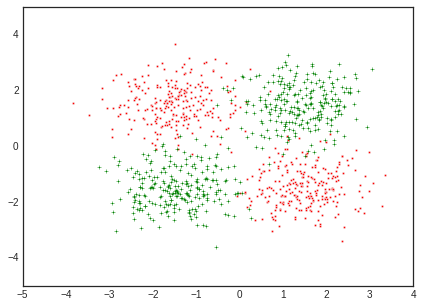

In [105]:
x_fourgauss,y_fourgauss=arf.load_csv('four_gaussians')
arf.plot_data(x_fourgauss,y_fourgauss)

#### Frontière hyperbolique

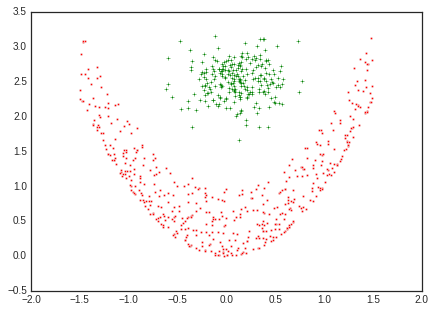

In [106]:
x_hyp,y_hyp=arf.load_csv('hyperbolic2')
arf.plot_data(x_hyp,y_hyp)

#### Frontière concentrique

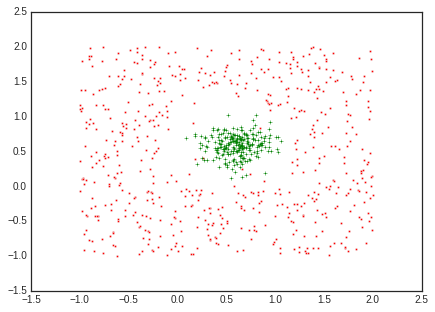

In [107]:
x_conc,y_conc=arf.load_csv('concentric2')
arf.plot_data(x_conc,y_conc)

#### Échequier

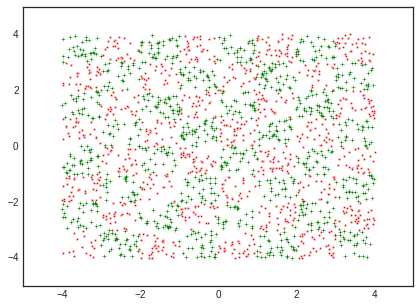

In [108]:
x_ech,y_ech=arf.load_csv('echequier')
arf.plot_data(x_ech,y_ech)

## Résultats/Interprétation

score, 

frontiere de décision

plots des scores avec la modification des hyperparamètres

### Arbres de décision

<img src="images/dectree_plot2.png" style="width: 600px;"/>

### K-nearest neighbors

In [10]:
knn=models.KNN(k=3)

#### Two Gaussians

arftools.py:117: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if data!=None:
/home/emmanuel/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


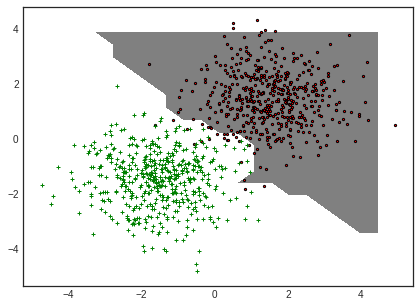

In [11]:
y_twogauss = models.mod_labels(y_twogauss,'0,1')
knn.fit(x_twogauss,y_twogauss)
arf.plot_data2(x_twogauss,y_twogauss,f=knn.predict)

#### Four Gaussians

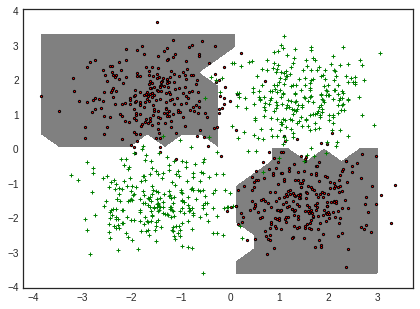

In [12]:
y_fourgauss = models.mod_labels(y_fourgauss,'0,1')
knn.fit(x_fourgauss,y_fourgauss)
arf.plot_data2(x_fourgauss,y_fourgauss,f=knn.predict)

#### Frontière hyperbolique

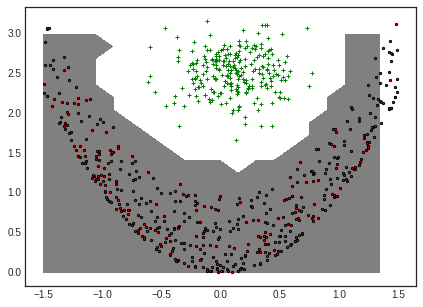

In [13]:
y_hyp = models.mod_labels(y_hyp,'0,1')
knn.fit(x_hyp,y_hyp)
arf.plot_data2(x_hyp,y_hyp,f=knn.predict)

#### Frontière concentrique


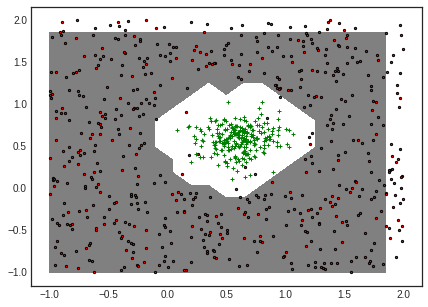

In [14]:
y_conc = models.mod_labels(y_conc,'0,1')
knn.fit(x_conc,y_conc)
arf.plot_data2(x_conc,y_conc,f=knn.predict)

#### Echequier

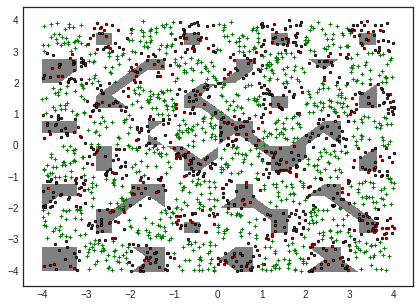

In [15]:
y_ech = models.mod_labels(y_ech,'0,1')
knn.fit(x_ech,y_ech)
arf.plot_data2(x_ech,y_ech,f=knn.predict)



Voici le résultat du KNN sur les données ....


<img src="images/knn_plot3.png" alt="Drawing" style="width: 600px;"/>

Nous voyons bien que ...

### Perceptron

In [16]:
perc=models.Perceptron()

#### Two Gaussians

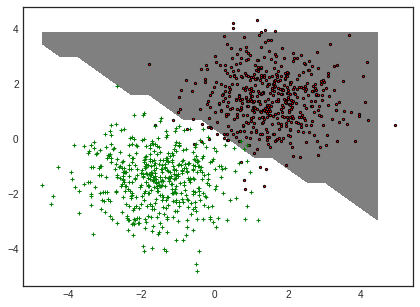

In [17]:
perc.fit(x_twogauss,y_twogauss)
arf.plot_data2(x_twogauss,y_twogauss,f=perc.predict)

#### Four Gaussians

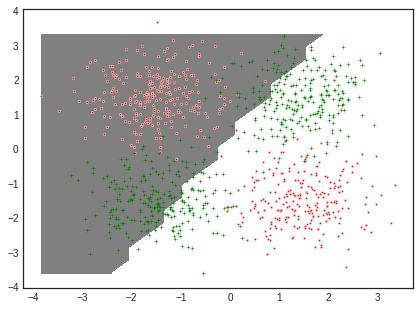

In [109]:
perc.fit(x_fourgauss,y_fourgauss)
arf.plot_data2(x_fourgauss,y_fourgauss,f=perc.predict)

Note: 

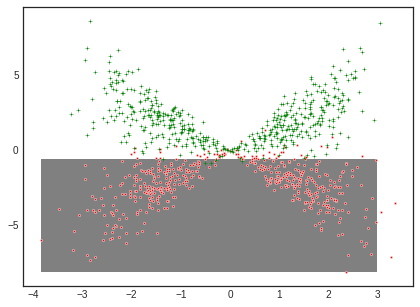

In [110]:
x_fourgauss2=np.copy(x_fourgauss)
x_fourgauss2[:,1]=x_fourgauss[:,1]*x_fourgauss[:,0]
perc.fit(x_fourgauss2,y_fourgauss)
arf.plot_data2(x_fourgauss2,y_fourgauss,f=perc.predict)

#### Frontière hyperbolique

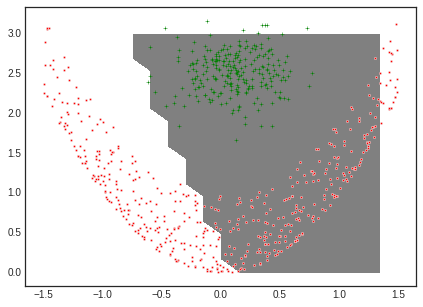

In [111]:
perc.fit(x_hyp,y_hyp)
arf.plot_data2(x_hyp,y_hyp,f=perc.predict)

Note: Nous savons ces données non linéaires, il peut donc être intéressant d'intégrer des features non linéaires aussi.

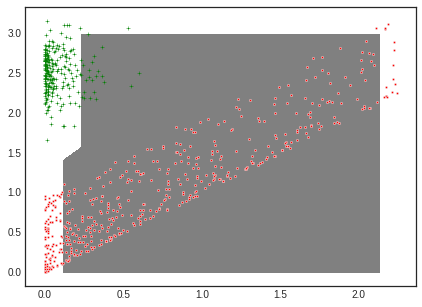

In [112]:
x_hyp2=np.copy(x_hyp)
x_hyp2[:,0]=x_hyp[:,0]*x_hyp[:,0]
perc.fit(x_hyp2,y_hyp)
arf.plot_data2(x_hyp2,y_hyp,f=perc.predict)

#### Frontière concentrique


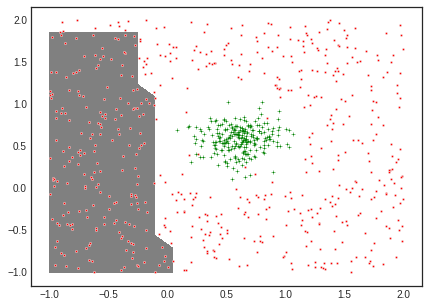

In [113]:
perc.fit(x_conc,y_conc)
arf.plot_data2(x_conc,y_conc,f=perc.predict)

Intuition: Les labels positifs semblent être proches du point (0.5,0.8).

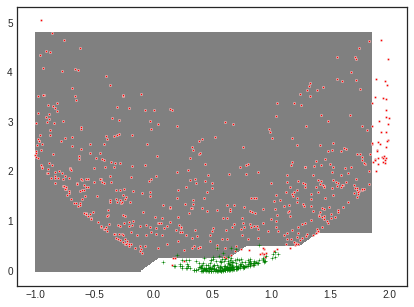

In [141]:
x_conc2=np.copy(x_conc)
x_conc2[:,1]=(x_conc[:,0]-0.5)*(x_conc[:,0]-0.5)+(x_conc[:,1]-0.8)*(x_conc[:,1]-0.8)
perc.fit(x_conc2,y_conc)
arf.plot_data2(x_conc2,y_conc,f=perc.predict)

Remarques....

#### Echequier

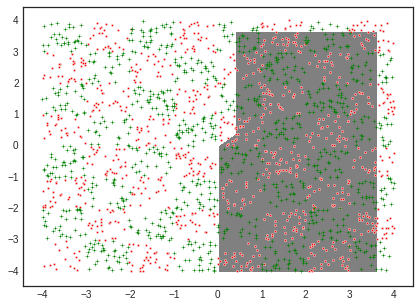

In [114]:
perc.fit(x_ech,y_ech)
arf.plot_data2(x_ech,y_ech,f=perc.predict)

### Réseau de neurones

Nous avons choisi de confronter nos résultats avec un réseau de neurones....

In [8]:
nn=models.NN(layers=[2,10,10,1],eps=0.1,max_iter=100000)

#### Two Gaussians

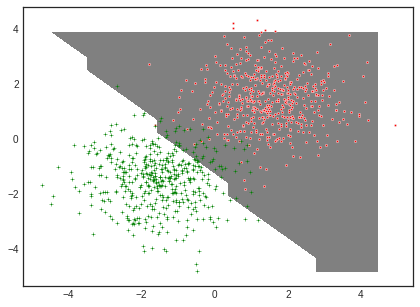

In [142]:
y_twogauss = models.mod_labels(y_twogauss,'-1,1')
nn.fit(x_twogauss,y_twogauss)
arf.plot_data2(x_twogauss,y_twogauss,f=nn.predict)

#### Four Gaussians

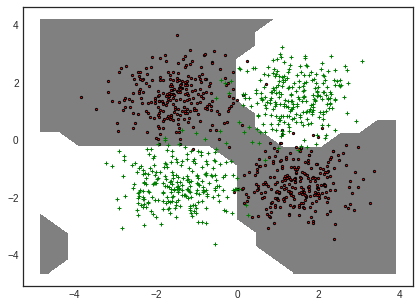

In [47]:
y_fourgauss = models.mod_labels(y_fourgauss,'-1,1')
nn.fit(x_fourgauss,y_fourgauss)
arf.plot_data2(x_fourgauss,y_fourgauss,f=nn.predict)

#### Frontière hyperbolique

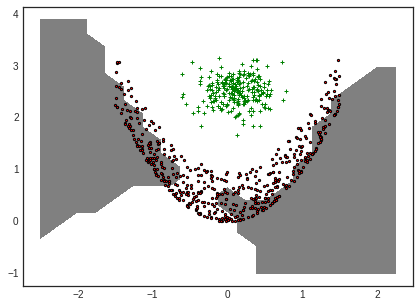

In [48]:
y_hyp = models.mod_labels(y_hyp,'-1,1')
nn.fit(x_hyp,y_hyp)
arf.plot_data2(x_hyp,y_hyp,f=nn.predict)

#### Frontière concentrique


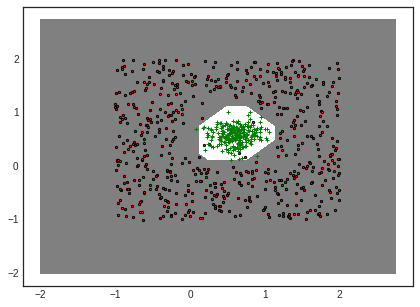

In [49]:
y_conc = models.mod_labels(y_conc,'-1,1')
nn.fit(x_conc,y_conc)
arf.plot_data2(x_conc,y_conc,f=nn.predict)

#### Echequier

arftools.py:117: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if data!=None:
/home/emmanuel/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


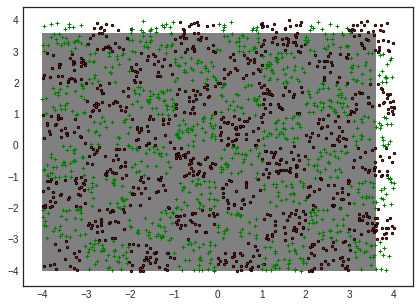

In [18]:
y_ech = models.mod_labels(y_ech,'-1,1')
nn.fit(x_ech,y_ech)
arf.plot_data2(x_ech,y_ech,f=nn.predict)

### Scores: Récapitulatif

In [29]:
dataset=['two_gaussians','four_gaussians','hyperbolic2','concentric2','echequier']
results=[]
for data in dataset:
    d={}
    x,y1=arf.load_csv(data)
    y2=models.mod_labels(y1,mod='0,1')
    
    bayes=models.Bayes()
    d['Naive Bayes']=models.cross_validation(bayes,x,y2,8)
    
    dt=models.DecisionTree()
    dt.maxdepth=4
    d['DecisionTree']=models.cross_validation(dt,x,y2,8)
    
    knn=models.KNN(k=3)
    d['KNN']=models.cross_validation(knn,x,y2,8)
    
    perc=models.Perceptron()
    d['Perceptron']=models.cross_validation(perc,x,y1,8)
    
    nn=models.NN(layers=[2,10,10,1],eps=0.1,max_iter=100000)
    d['Reseau de Neurone']=models.cross_validation(nn,x,y1,8)
    print(data)
    results.append(d)    
    
df=pd.DataFrame(results,index=dataset)
df

two_gaussians
four_gaussians
hyperbolic2
concentric2
echequier


DecisionTree       KNN  Naive Bayes  Perceptron
two_gaussians       0.459000  0.977000     0.982000    0.253080
four_gaussians      0.468000  0.947000     0.475000    0.258336
hyperbolic2         0.666695  1.000000     0.997340    0.158900
concentric2         0.702381  0.991667     0.983333    0.071417
echequier           0.509500  0.894000     0.488000    0.244860

In [95]:
df.to_csv('data/scores.csv')

In [100]:
df2=pd.read_csv('data/scores.csv',index_col=0)

DecisionTree       KNN  Naive Bayes  Perceptron
two_gaussians       0.459000  0.977000     0.982000    0.253080
four_gaussians      0.468000  0.947000     0.475000    0.258336
hyperbolic2         0.666695  1.000000     0.997340    0.158900
concentric2         0.702381  0.991667     0.983333    0.071417
echequier           0.509500  0.894000     0.488000    0.244860

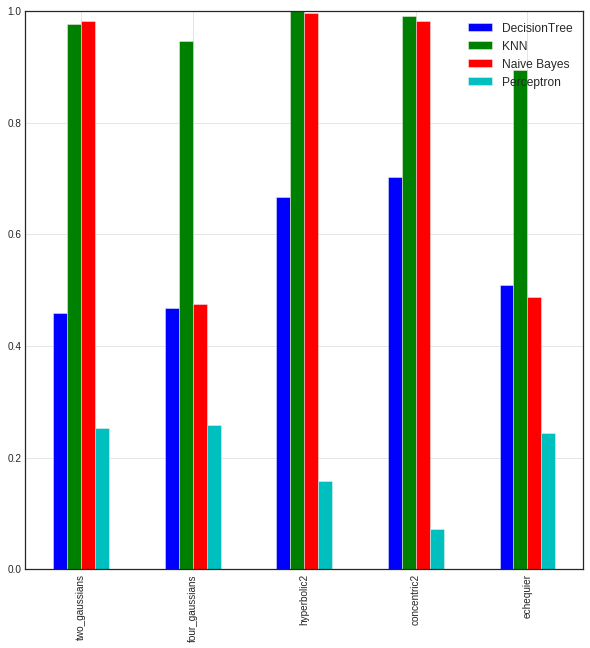

In [147]:
#matplotlib.style.use('ggplot')
df.plot(kind='bar',title='',figsize=(10,10),grid=True)

## Use case: données du Titanic

Présentation rapide. D'ou viennet les données?
Explication du pre-processing, etc


Nous utilisons les données proposés par le site kaggle.com, disponibles à partir du lieu suivant:

https://www.kaggle.com/c/titanic/data

Nous avons effectué un pre-processing, où nous avons  les données pour l'analyse suivante. 


### Données

In [163]:
path='data/'
train_df=pd.read_csv(path+'final_train.csv',index_col=False)
test_df=pd.read_csv(path+'final_test.csv')
datax=train_df[['Pclass','Age','Parch','Fare','Embarked','Gender']].values
datay=train_df['Survived'].values
train_df.head()

Survived  Pclass  Age  SibSp  Parch     Fare  Embarked  Gender
0         0       3   22      1      0   7.2500         2       1
1         1       1   38      1      0  71.2833         0       0
2         1       3   26      0      0   7.9250         2       0
3         1       1   35      1      0  53.1000         2       0
4         0       3   35      0      0   8.0500         2       1

In [165]:
d={}
x,y1=datax,datay
y2=models.mod_labels(y1,mod='0,1')

bayes=models.Bayes()
d['Naive Bayes']=models.cross_validation(bayes,x,y2,8)

dt=models.DecisionTree()
dt.maxdepth=4
d['DecisionTree']=models.cross_validation(dt,x,y2,8)

knn=models.KNN(k=3)
d['KNN']=models.cross_validation(knn,x,y2,8)

perc=models.Perceptron()
d['Perceptron']=models.cross_validation(perc,x,y1,8)

nn=models.NN(layers=[2,10,10,1],eps=0.1,max_iter=100000)
nn.fit(x,y1)
#d['Reseau de Neurone']=models.cross_validation(nn,x,y1,8)
results_titanic.append(d)    
    
df_titanic=pd.DataFrame(d,index=['Titanic data'])
df_titanic

ValueError: shapes (7,) and (3,11) not aligned: 7 (dim 0) != 3 (dim 0)

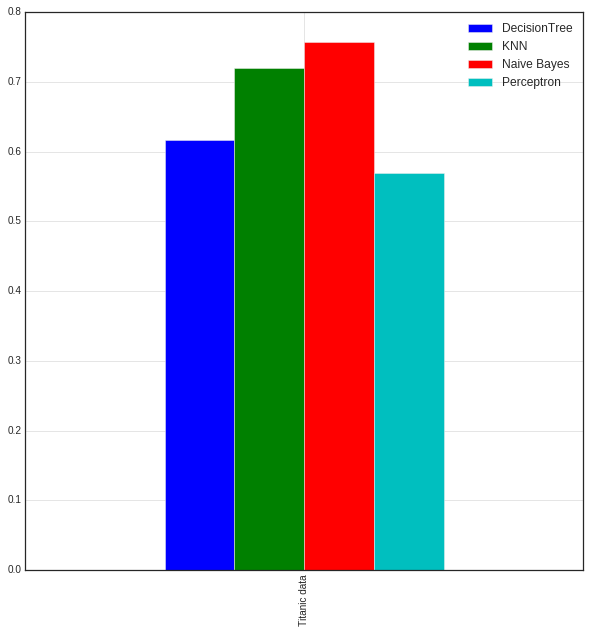

In [159]:
df_titanic.plot(kind='bar',title='',figsize=(10,10),grid=True)

### Pour aller plus loin